In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score,
                             roc_curve, classification_report, auc, precision_recall_fscore_support)
from sklearn.model_selection import train_test_split
import xgboost as xgb
import time
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from matplotlib import rcParams


In [54]:
file_path = '/content/drive/MyDrive/Alldata/Train_data_New_Labeled.csv'
df = pd.read_csv(file_path)

df.head()

,batch_label,A0A075B6H7,A0A075B6J9,A0A0B4J1X5,A0A0C4DH36,A0A0C4DH43,A0A0C4DH67,A0A2R8Y4L2,A1A5D9,A6NI72,...,G1VH46_9BACT,E4ZDX7_NEIL0,E7RXF0_9BURK,G5G9G6_9BACT,A0A1H9N1D3_9LACT,PSD_NEIMB,F4EZW1_SELS3,F9DG16_9BACT,Unnamed: 5330,label
0,A1_11,98975700,2098021,61841200,4169000,7953570,0,2138280,0.0,0,...,0,2771727,0.0,0.0,0,0,0.0,0.0,NaN,0
1,A1_12,70159520,2795550,68706800,2076218,8723430,618985,2796730,0.0,0,...,0,17886300,0.0,0.0,0,0,1997213.0,0.0,NaN,1
2,A1_13,108736600,4982160,103378900,6393000,11587240,1822855,3839750,206095.8,0,...,1323880,4530410,0.0,7862640.0,0,0,0.0,0.0,NaN,1
3,A1_14,18277720,609439,16986710,0,0,0,0,0.0,0,...,3047630,60345600,0.0,4309540.0,0,0,0.0,0.0,NaN,0
4,A1_1,0,1834376,46157000,3804630,8513950,0,6766640,0.0,0,...,0,7693080,0.0,0.0,0,0,729930.0,0.0,NaN,0


In [55]:
df.shape

(240, 5332)

In [56]:
# dropping the batch_label column
columns_to_drop = [col for col in df.columns if col == 'batch_label' or col == 'Unnamed: 5330']
df = df.drop(columns=columns_to_drop)
df.shape

(240, 5330)

In [57]:
df.head()

,A0A075B6H7,A0A075B6J9,A0A0B4J1X5,A0A0C4DH36,A0A0C4DH43,A0A0C4DH67,A0A2R8Y4L2,A1A5D9,A6NI72,A8K2U0,...,A0A069ZK09_9PORP,G1VH46_9BACT,E4ZDX7_NEIL0,E7RXF0_9BURK,G5G9G6_9BACT,A0A1H9N1D3_9LACT,PSD_NEIMB,F4EZW1_SELS3,F9DG16_9BACT,label
0,98975700,2098021,61841200,4169000,7953570,0,2138280,0.0,0,46531100,...,0,0,2771727,0.0,0.0,0,0,0.0,0.0,0
1,70159520,2795550,68706800,2076218,8723430,618985,2796730,0.0,0,84710800,...,0,0,17886300,0.0,0.0,0,0,1997213.0,0.0,1
2,108736600,4982160,103378900,6393000,11587240,1822855,3839750,206095.8,0,94359600,...,0,1323880,4530410,0.0,7862640.0,0,0,0.0,0.0,1
3,18277720,609439,16986710,0,0,0,0,0.0,0,23196300,...,0,3047630,60345600,0.0,4309540.0,0,0,0.0,0.0,0
4,0,1834376,46157000,3804630,8513950,0,6766640,0.0,0,94153200,...,0,0,7693080,0.0,0.0,0,0,729930.0,0.0,0


XGBoost Model

XGBoost Hyperparameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


Training Accuracy: 1.0000

Test Accuracy: 0.8333

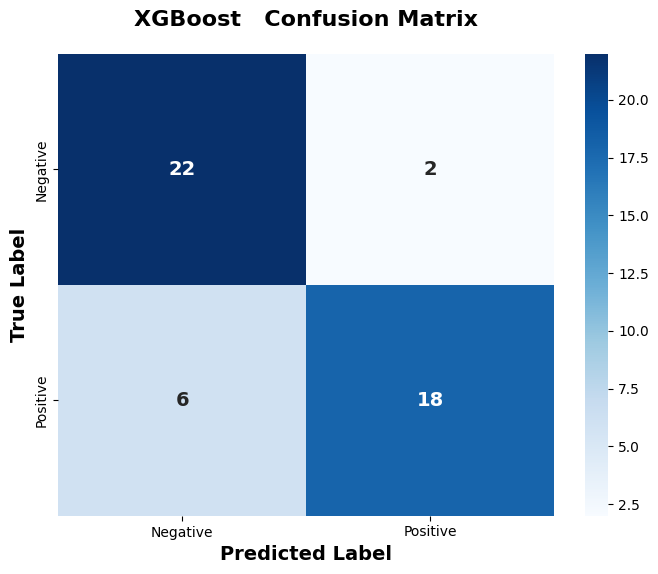

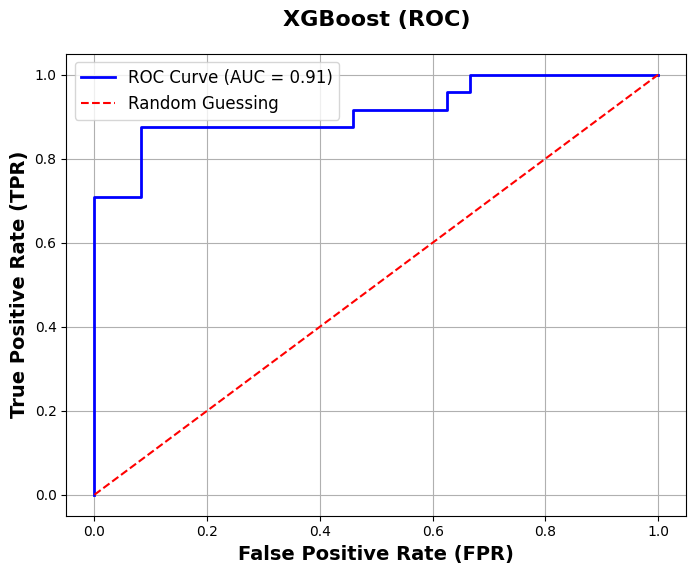


**Precision, Recall, F1 Score, and Accuracy for Each Class**
Negative Class - Precision: 0.7857, Recall: 0.9167, F1 Score: 0.8462, Accuracy: 0.9167
Positive Class - Precision: 0.9000, Recall: 0.7500, F1 Score: 0.8182, Accuracy: 0.7500


In [58]:
# Set global font to Times New Roman
plt.rcParams['font.family'] = 'sans-serif'

# Prepare data
X = df.drop(columns=['label']).values  # Features
y = df['label'].values  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost Classifier
np.random.seed(42)
xgb_classifier = xgb.XGBClassifier()

# Display hyperparameters
print("XGBoost Hyperparameters:")
print(xgb_classifier.get_params())
print('\n' + '='*50 + '\n')

# Train the model
xgb_classifier.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = xgb_classifier.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
y_predictXGB = xgb_classifier.predict(X_test)
y_probs = xgb_classifier.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_predictXGB)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Classification report
print('\n' + '='*50)
print('**XGBoost Classifier Results**')
print('='*50)
print(classification_report(y_test, y_predictXGB, target_names=['Negative', 'Positive']))
print('='*50 + '\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predictXGB)
conf_df = pd.DataFrame(conf_matrix,
                      columns=['Predicted Negative', 'Predicted Positive'],
                      index=['Actual Negative', 'Actual Positive'])

print("**Confusion Matrix:**")
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('XGBoost   Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.show()

# ROC Curve Analysis
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('XGBoost (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.show()


# Calculate and print precision, recall, F1 score, and accuracy for each class
precision_neg = precision_score(y_test, y_predictXGB, pos_label=0)
precision_pos = precision_score(y_test, y_predictXGB, pos_label=1)
recall_neg = recall_score(y_test, y_predictXGB, pos_label=0)
recall_pos = recall_score(y_test, y_predictXGB, pos_label=1)
f1_neg = f1_score(y_test, y_predictXGB, pos_label=0)
f1_pos = f1_score(y_test, y_predictXGB, pos_label=1)

# Calculate accuracy for each class using the confusion matrix
accuracy_neg = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])  # True Negative / (True Negative + False Positive)
accuracy_pos = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])  # True Positive / (True Positive + False Negative)

print("\n**Precision, Recall, F1 Score, and Accuracy for Each Class**")
print('='*50)
print(f"Negative Class - Precision: {precision_neg:.4f}, Recall: {recall_neg:.4f}, F1 Score: {f1_neg:.4f}, Accuracy: {accuracy_neg:.4f}")
print(f"Positive Class - Precision: {precision_pos:.4f}, Recall: {recall_pos:.4f}, F1 Score: {f1_pos:.4f}, Accuracy: {accuracy_pos:.4f}")
print('='*50)
